In [ ]:
# 介紹與步驟
# 台股個股資料爬蟲
# 台灣證交所 個股日成交資訊 
# 網址: https://www.twse.com.tw/zh/trading/historical/stock-day.html
# 開啟chrom開發人員工具 >Network > XHR >查尋


In [212]:
#匯入套件
import requests as r
import json
import pandas as pd
from datetime import datetime,date
import matplotlib.pyplot as plt

In [99]:
# 1.下載一個月的台股資料  date 可更改下載日期 、stockNo 可更改股票代號
url = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240818&stockNo=0050&response=json&_=1723954602708" 
# url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=202009&stockNo=2330"
r.get(url)
res = r.get(url)
res.json()
stock_json = res.json()
stock_json
stock_json['data']
# pd.DataFrame.from_dict(stock_json['data'])
pd.DataFrame(stock_json['data'])
stock_df = pd.DataFrame(stock_json['data'])
stock_df.head()
stock_json['fields']
stock_df.columns = stock_json['fields']
stock_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/08/01,"50,257,642","48,211,390,158",969.00,969.00,948.00,960.00,+26.00,"66,845"
1,113/08/02,"89,044,852","81,488,499,047",918.00,928.00,903.00,903.00,-57.00,"451,562"
2,113/08/05,"159,662,795","133,482,646,539",852.00,857.00,813.00,815.00,-88.00,"588,373"
3,113/08/06,"108,521,787","94,271,532,567",868.00,895.00,840.00,880.00,+65.00,"189,677"
4,113/08/07,"62,643,163","56,900,026,373",901.00,920.00,893.00,920.00,+40.00,"109,333"
5,113/08/08,"41,288,222","37,045,507,217",901.00,905.00,887.00,896.00,-24.00,"107,303"
6,113/08/09,"54,464,183","50,586,946,042",927.00,934.00,922.00,934.00,+38.00,"94,661"
7,113/08/12,"40,968,742","38,572,439,136",942.00,948.00,931.00,940.00,+6.00,"73,731"
8,113/08/13,"26,831,364","25,227,760,336",945.00,945.00,937.00,941.00,+1.00,"39,633"
9,113/08/14,"40,527,779","38,507,151,446",951.00,955.00,945.00,948.00,+7.00,"56,190"


In [202]:
# 2.下載歷年台股個股成交資料
# url = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240818&stockNo=0050&response=json&_=1723954602708"
month_list = pd.date_range('2024-06-01','2024-08-01',freq='MS').strftime("%Y%m%d").tolist()
for month in month_list:
    print(month)
df = pd.DataFrame()
df
for month in month_list:
    url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month +"&stockNo=2317" #證交所API
    res = r.get(url)
    stock_json = res.json() 
    stock_df = pd.DataFrame.from_dict(stock_json['data']) # 解析 JSON 並轉換為 DataFrame
    df = pd.concat([df,stock_df],ignore_index=True) # 合併 DataFrame    註:append 方法  pandas 已棄用 改成 cancat 
df
df.columns = stock_json['fields']
df

20240601
20240701
20240801


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/06/03,"90,323,078","15,969,599,627",177.00,179.50,174.50,176.50,+4.50,"53,352"
1,113/06/04,"104,412,410","18,008,953,714",175.00,176.50,170.00,171.00,-5.50,"78,780"
2,113/06/05,"118,643,822","20,674,659,753",171.00,178.00,168.50,175.50,+4.50,"66,524"
3,113/06/06,"122,671,053","22,094,756,570",181.50,183.00,177.50,177.50,+2.00,"78,146"
4,113/06/07,"56,520,045","10,049,044,147",177.50,180.00,176.50,177.50,0.00,"43,159"
5,113/06/11,"85,329,821","15,338,544,528",179.00,181.50,177.50,180.50,+3.00,"38,710"
6,113/06/12,"126,289,783","23,393,538,750",184.00,188.00,182.50,187.50,+7.00,"73,072"
7,113/06/13,"148,512,198","28,450,483,573",191.00,195.00,188.00,192.00,+4.50,"101,895"
8,113/06/14,"125,211,164","24,479,589,921",192.50,198.50,191.00,198.00,+6.00,"75,673"
9,113/06/17,"90,945,035","17,988,971,061",197.50,200.00,195.00,200.00,+2.00,"59,920"


In [229]:
import requests as r
import pandas as pd
from datetime import date

def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    # 創建開始日期和結束日期
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    
    # 生成月份列表
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    
    for month in month_list:
        url =  "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=" + month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()  # 獲取JSON數據
        
        # 將數據轉換為DataFrame
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        
        # 合併DataFrame
        df = pd.concat([df, stock_df], ignore_index=True)
    
    # 設置列名
    df.columns = stock_json['fields']
    
    return df

# 獲取 2317 股票數據
stock_2317 = get_stock_data(start_year=2024, start_month=6, end_year=2024, end_month=8, stock_code=2317)
stock_2317


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/06/03,"90,323,078","15,969,599,627",177.00,179.50,174.50,176.50,+4.50,"53,352"
1,113/06/04,"104,412,410","18,008,953,714",175.00,176.50,170.00,171.00,-5.50,"78,780"
2,113/06/05,"118,643,822","20,674,659,753",171.00,178.00,168.50,175.50,+4.50,"66,524"
3,113/06/06,"122,671,053","22,094,756,570",181.50,183.00,177.50,177.50,+2.00,"78,146"
4,113/06/07,"56,520,045","10,049,044,147",177.50,180.00,176.50,177.50,0.00,"43,159"
5,113/06/11,"85,329,821","15,338,544,528",179.00,181.50,177.50,180.50,+3.00,"38,710"
6,113/06/12,"126,289,783","23,393,538,750",184.00,188.00,182.50,187.50,+7.00,"73,072"
7,113/06/13,"148,512,198","28,450,483,573",191.00,195.00,188.00,192.00,+4.50,"101,895"
8,113/06/14,"125,211,164","24,479,589,921",192.50,198.50,191.00,198.00,+6.00,"75,673"
9,113/06/17,"90,945,035","17,988,971,061",197.50,200.00,195.00,200.00,+2.00,"59,920"


In [231]:
# 3.將下載的個股資料另存成csv檔案
stock_2317.to_csv("2317.csv")

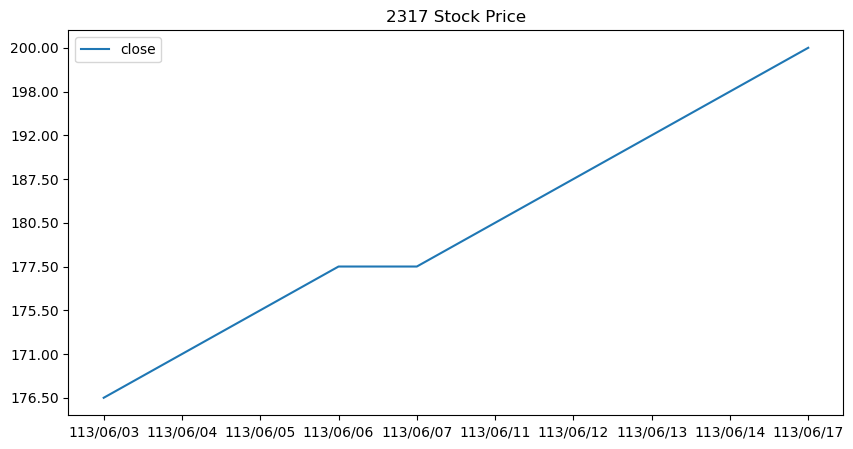

In [264]:
# 4. 劃出下載個股的走勢圖
stock_2317_2 = stock_2317[:10]
fig = plt.figure(figsize=(10,5))
plt.title('2317 Stock Price')
plt.plot(stock_2317_2['日期'],stock_2317_2['收盤價'])
plt.legend(['close'])

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
